 **Load libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from numpy import mean
from sklearn import preprocessing
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from six import StringIO
from logging import critical
from scipy.stats import zscore
from IPython.display import Image
from mlxtend.plotting import plot_confusion_matrix
import plotly.offline as py
import plotly.graph_objs as go


**Read the data**


In [ ]:
url = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
ds=pd.read_csv(url)
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**checking Missing values**


In [ ]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



No     1233
Yes     237
Name: Attrition, dtype: int64

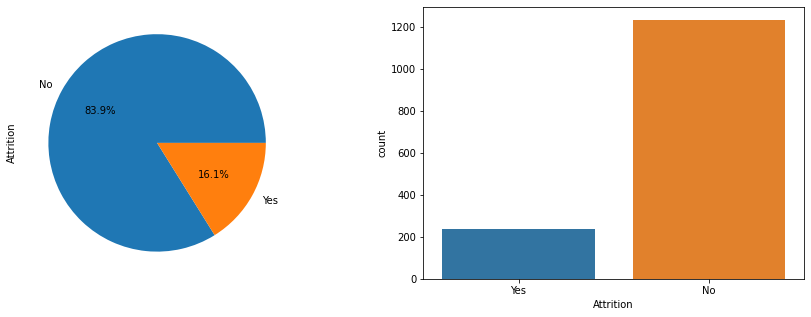

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ds['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(ds['Attrition'])
ds['Attrition'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Male      882
Female    588
Name: Gender, dtype: int64

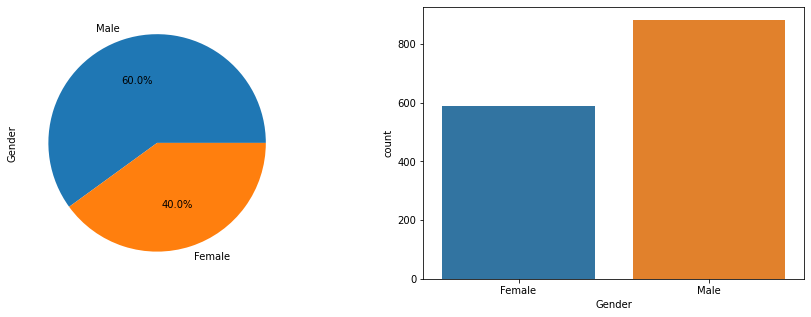

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ds['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(ds['Gender'])
ds['Gender'].value_counts()

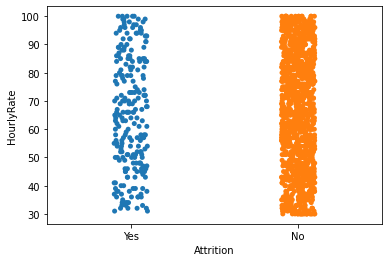

In [ ]:
sns.stripplot(x='Attrition',y='HourlyRate',data=ds)

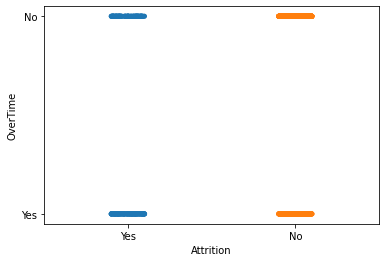

In [ ]:
sns.stripplot(x='Attrition',y='OverTime',data=ds)


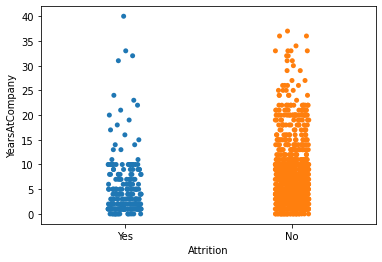

In [ ]:
sns.stripplot(x='Attrition',y='YearsAtCompany',data=ds)

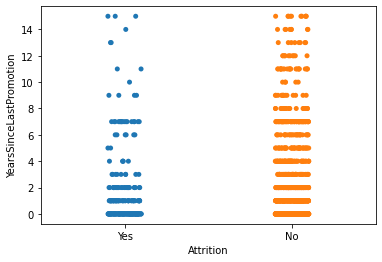

In [ ]:
sns.stripplot(x='Attrition',y='YearsSinceLastPromotion',data=ds)


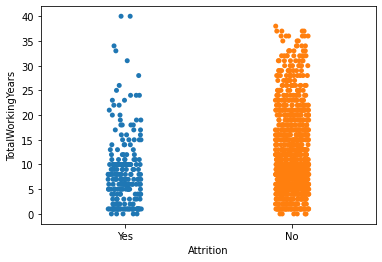

In [ ]:
sns.stripplot(x='Attrition',y='TotalWorkingYears',data=ds)


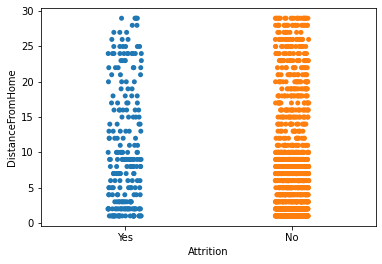

In [ ]:
sns.stripplot(x='Attrition',y='DistanceFromHome',data=ds)


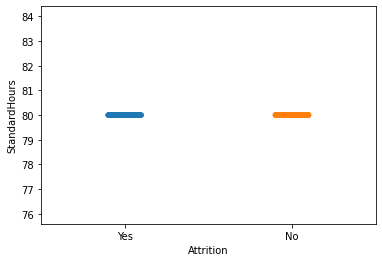

In [ ]:
sns.stripplot(x='Attrition',y='StandardHours',data=ds)


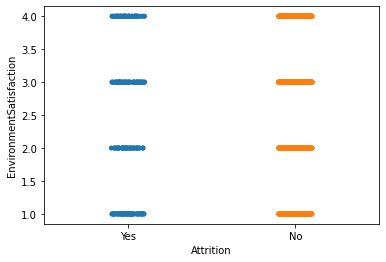

In [ ]:
sns.stripplot(x='Attrition',y='EnvironmentSatisfaction',data=ds)


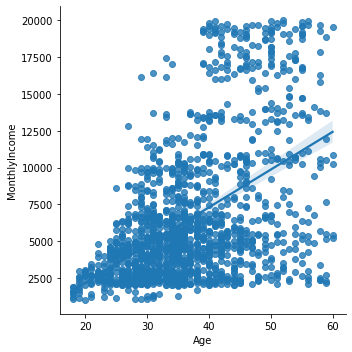

In [ ]:
sns.lmplot(x='Age',y='MonthlyIncome',data=ds)


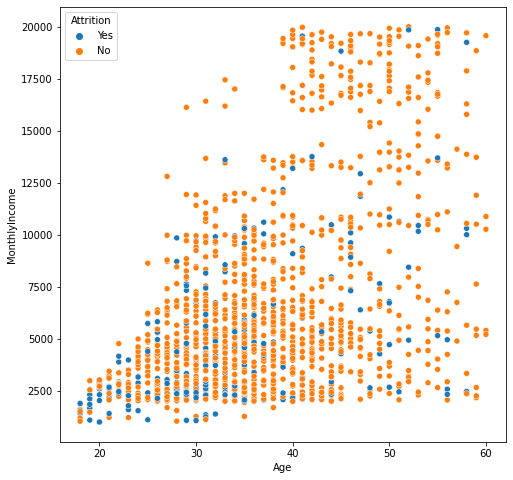

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='MonthlyIncome',hue='Attrition',data=ds)

<Figure size 576x576 with 0 Axes>

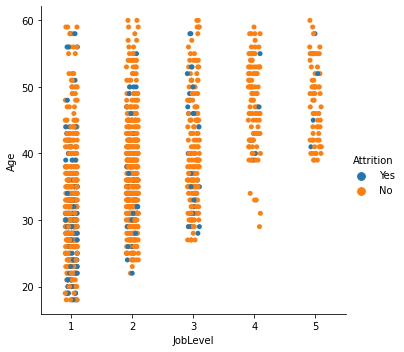

In [ ]:
plt.figure(figsize=(8,8))
sns.catplot(x='JobLevel',y='Age',hue='Attrition',data=ds)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



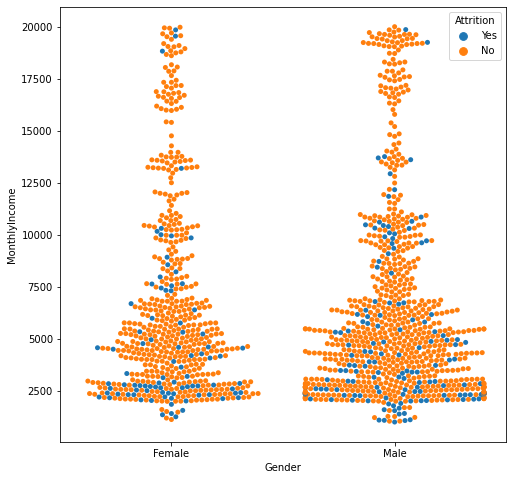

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='Gender',y='MonthlyIncome',hue='Attrition',data=ds)

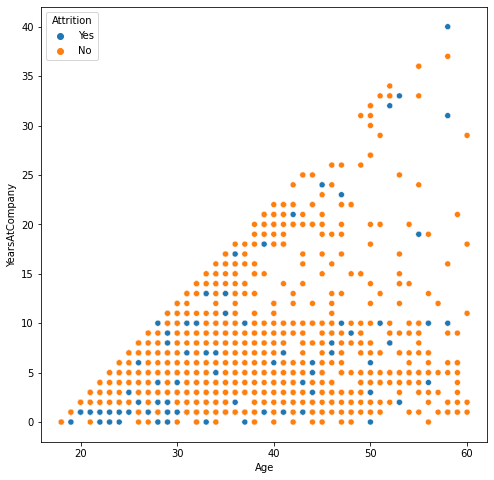

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=ds)

**check conctant coulmns**

In [ ]:
ds.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
cons= []
for col, value in ds.iteritems():
    if value.nunique() == 1 :
        cons.append(col)
ds_cons = ds[cons]
for col in ds_cons.columns:
  print(col)

EmployeeCount
Over18
StandardHours


**remove conctant coulmns**

In [ ]:
ds.drop(ds_cons,axis=1, inplace=True)

**check binary coulmns**

In [ ]:
binary=[]
binary = ds.nunique()[ds.nunique() == 2].keys().tolist()
bin_col = ds[binary]
for col in bin_col.columns:
  print(col)

Attrition
Gender
OverTime
PerformanceRating


**replace binary values by zeros and ones**

In [ ]:
repl_bin_col = {'Attrition':{'Yes':1, 'No':0}, 
                    'Gender':{'Female':0, 'Male':1}, 
                    'OverTime':{'Yes':1,'No':0}}
ds.replace(repl_bin_col, inplace=True)

In [ ]:
ds.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

**check categorical coulmns**

In [ ]:
categorical= []
for col, value in ds.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
cat_col = ds[categorical]
for col in cat_col.columns:
  print(col)

BusinessTravel
Department
EducationField
JobRole
MaritalStatus


**remove categorical coulmns**

In [ ]:
ds.drop(cat_col ,axis=1, inplace=True)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int64
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MonthlyIncome             1470 non-null   int64
 13  MonthlyRate               1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

**describtion of the data (mean,std,min,max,...)**

In [ ]:
ds.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,0.600000,65.891156,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
ds['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

**check the best threshold for the outliers**

In [ ]:
def outliers(z):
    for i in np.arange(3,5,0.2):
        data=ds.copy()
        data=data[(z<i).all(axis=1)]
        loss=(ds.shape[0]-data.shape[0])/ds.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [ ]:
z=np.abs(zscore(ds))
outliers(z)

With threshold 3.0 data loss is 5.65%
With threshold 3.2 data loss is 4.22%
With threshold 3.4 data loss is 3.13%
With threshold 3.6 data loss is 2.72%
With threshold 3.8 data loss is 1.77%
With threshold 4.0 data loss is 0.88%
With threshold 4.2 data loss is 0.68%
With threshold 4.4 data loss is 0.34%
With threshold 4.6 data loss is 0.27%
With threshold 4.8 data loss is 0.14%


**removeing the outliers**

In [ ]:
ds=ds[(z<3.2).all(axis=1)]


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1408 non-null   int64
 1   Attrition                 1408 non-null   int64
 2   DailyRate                 1408 non-null   int64
 3   DistanceFromHome          1408 non-null   int64
 4   Education                 1408 non-null   int64
 5   EmployeeNumber            1408 non-null   int64
 6   EnvironmentSatisfaction   1408 non-null   int64
 7   Gender                    1408 non-null   int64
 8   HourlyRate                1408 non-null   int64
 9   JobInvolvement            1408 non-null   int64
 10  JobLevel                  1408 non-null   int64
 11  JobSatisfaction           1408 non-null   int64
 12  MonthlyIncome             1408 non-null   int64
 13  MonthlyRate               1408 non-null   int64
 14  NumCompaniesWorked        1408 non-null 

f for features , t for target 

In [ ]:
f = ds.drop('Attrition', axis=1)
t = ds.Attrition

In [ ]:
f_train,f_test,t_train,t_test=train_test_split(f,t,test_size=0.25,random_state=0)

**Decision Tree**

In [ ]:
def print_score(clf, f_train, t_train, f_test, t_test, train=True):
    if train:
        pred = clf.predict(f_train)
        clf_report = pd.DataFrame(classification_report(t_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(t_train, pred) * 100:.2f}%\n")
        print(f"Confusion Matrix: \n {confusion_matrix(t_train, pred)}\n")
    elif train==False:
        pred = clf.predict(f_test)
        clf_report = pd.DataFrame(classification_report(t_test, pred, output_dict=True))
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(t_test, pred) * 100:.2f}%\n")
        print(f"Confusion Matrix: \n {confusion_matrix(t_test, pred)}\n")
        

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(f_train, t_train)

print_score(tree_clf, f_train, t_train, f_test, t_test, train=True)
print_score(tree_clf, f_train, t_train, f_test, t_test, train=False)


Train Result:

Accuracy Score: 100.00%

Confusion Matrix: 
 [[885   0]
 [  0 171]]

Test Result:

Accuracy Score: 76.70%

Confusion Matrix: 
 [[253  41]
 [ 41  17]]



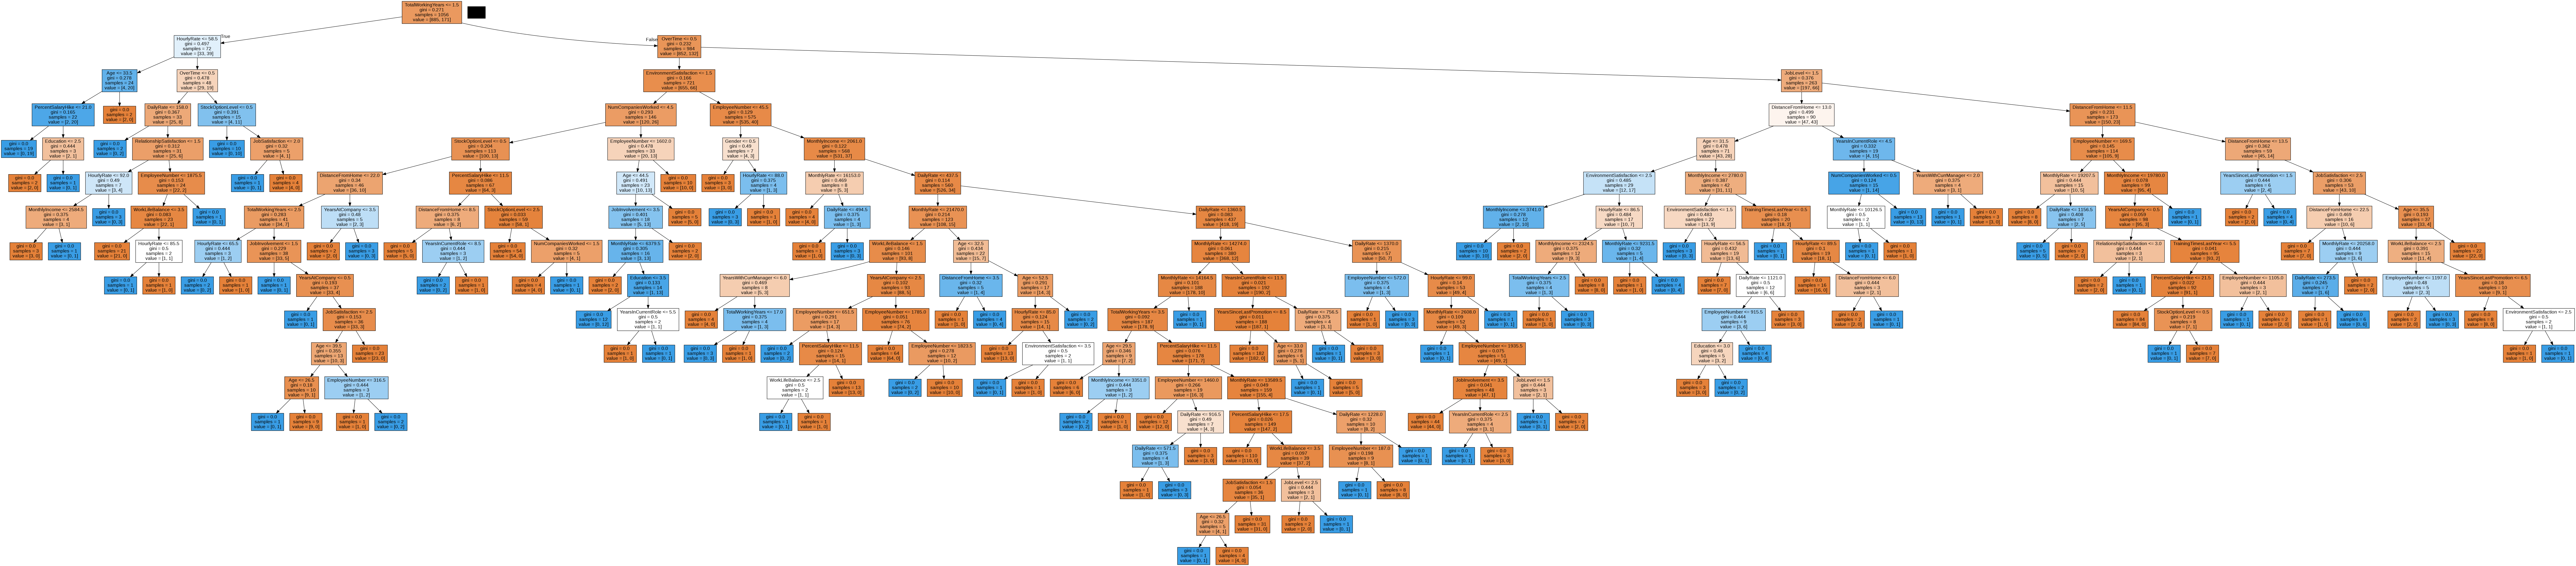

In [ ]:

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

**splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = ds.drop('Attrition', axis=1)
y = ds.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.8380681818181818

In [ ]:
features = list(ds.columns)
features.remove("Attrition")

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.71%
Leaving Rate: 16.29%
===============TEST=================
Staying Rate: 83.81%
Leaving Rate: 16.19%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

**accuracy**

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863  21]
 [107  65]]
ACCURACY SCORE:
0.8788
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.889691    0.755814  0.878788     0.822752      0.867885
recall       0.976244    0.377907  0.878788     0.677076      0.878788
f1-score     0.930960    0.503876  0.878788     0.717418      0.861397
support    884.000000  172.000000  0.878788  1056.000000   1056.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[283  12]
 [ 35  22]]
ACCURACY SCORE:
0.8665
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.889937   0.647059  0.866477    0.768498      0.850607
recall       0.959322   0.385965  0.866477    0.672643      0.866477
f1-score     0.923328   0.483516  0.866477    0.703422      0.852108
support    295.000000  57.000000  0.866477  352.000000    352.000000


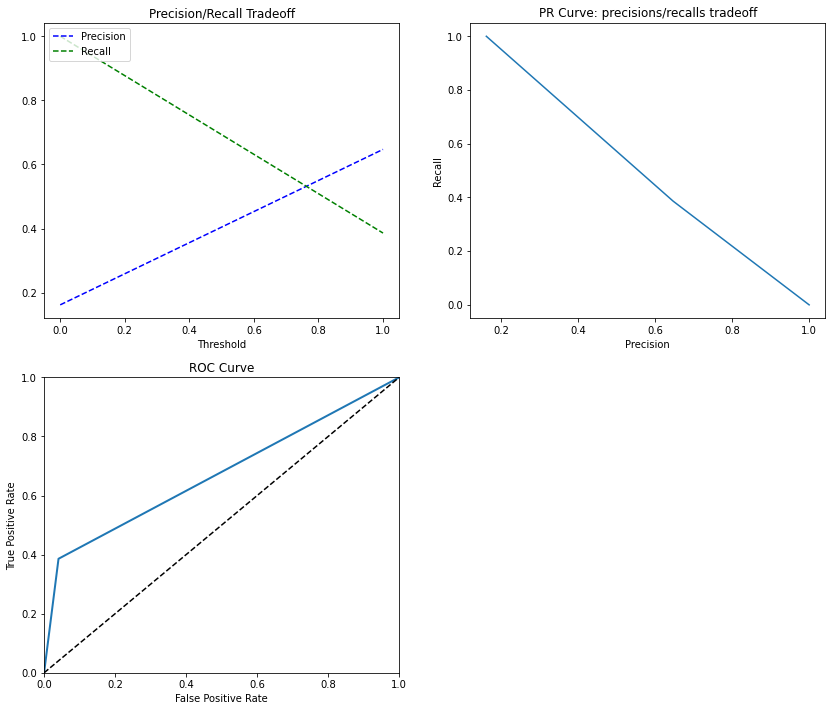

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[884   0]
 [  0 172]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    884.0  172.0       1.0     1056.0        1056.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[283  12]
 [ 48   9]]
ACCURACY SCORE:
0.8295
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.854985   0.428571  0.829545    0.641778      0.785935
recall       0.959322   0.157895  0.829545    0.558608      0.829545
f1-score     0.904153   0.230769  0.829545    0.567461      0.795111
support    295.000000  57.000000  0.829545  352.000000    352.000000


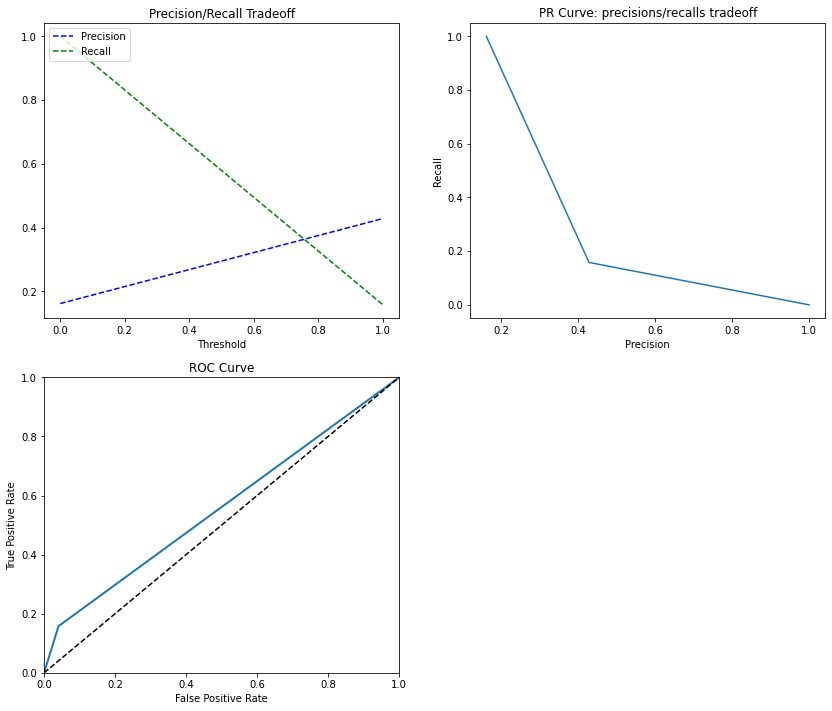

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

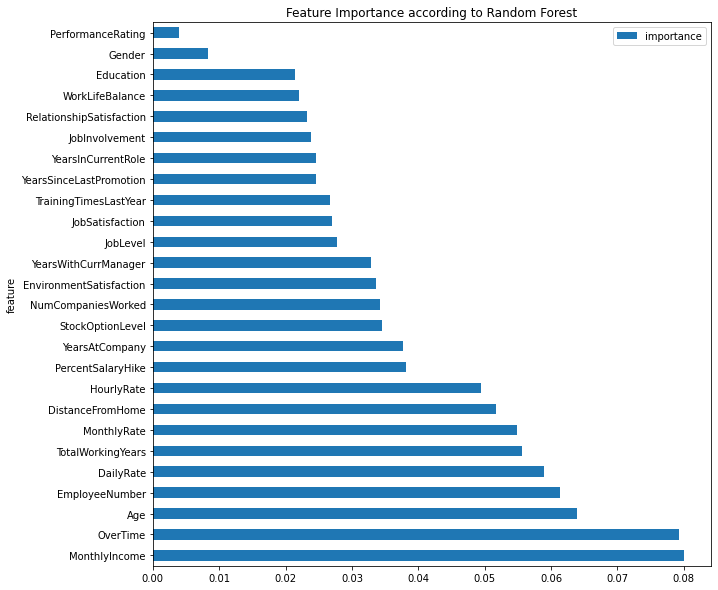

In [ ]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[867  17]
 [119  53]]
ACCURACY SCORE:
0.8712
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.879310    0.757143  0.871212     0.818227      0.859412
recall       0.980769    0.308140  0.871212     0.644454      0.871212
f1-score     0.927273    0.438017  0.871212     0.682645      0.847583
support    884.000000  172.000000  0.871212  1056.000000   1056.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[286   9]
 [ 37  20]]
ACCURACY SCORE:
0.8693
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885449   0.689655  0.869318    0.787552      0.853744
recall       0.969492   0.350877  0.869318    0.660184      0.869318
f1-score     0.925566   0.465116  0.869318    0.695341      0.851005
support    295.000000  57.000000  0.869318  352.000000    352.000000


In [ ]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [ ]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[870  14]
 [110  62]]
ACCURACY SCORE:
0.8826
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887755    0.815789  0.882576     0.851772      0.876033
recall       0.984163    0.360465  0.882576     0.672314      0.882576
f1-score     0.933476    0.500000  0.882576     0.716738      0.862872
support    884.000000  172.000000  0.882576  1056.000000   1056.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[287   8]
 [ 37  20]]
ACCURACY SCORE:
0.8722
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885802   0.714286  0.872159    0.800044      0.858028
recall       0.972881   0.350877  0.872159    0.661879      0.872159
f1-score     0.927302   0.470588  0.872159    0.698945      0.853346
support    295.000000  57.000000  0.872159  352.000000    352.000000


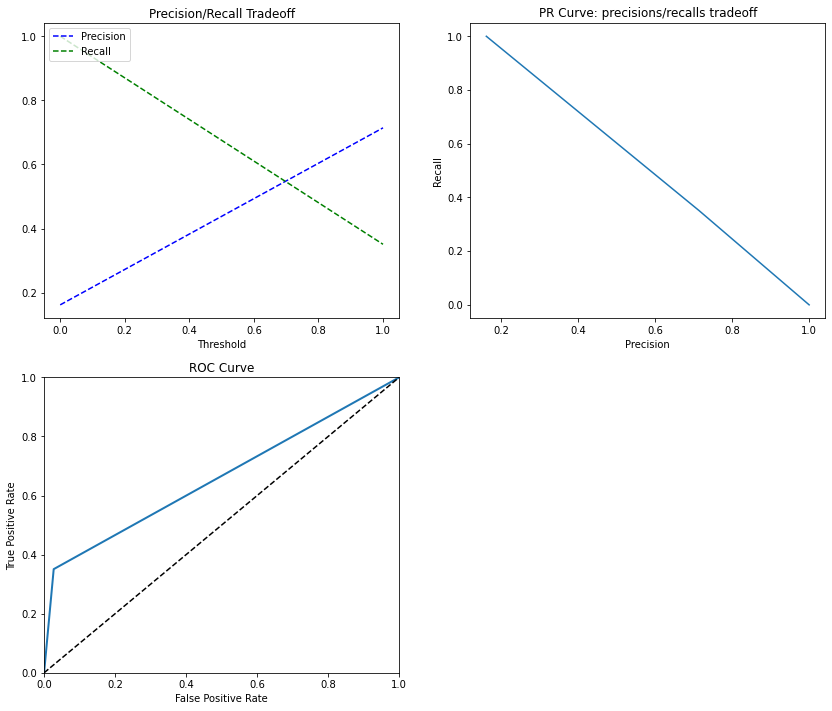

In [ ]:

precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

 **Comparing Models Prerformance**

In [ ]:
ml_models = {
    'Random Forest': rf_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.559
LOGISTIC REGRESSION            roc_auc_score: 0.564
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but SVC was fitted without feature names



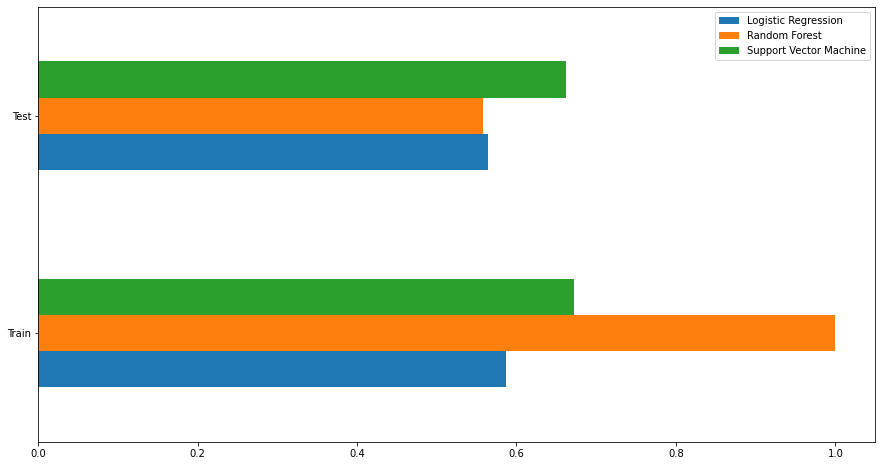

In [ ]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))